In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
# reading the training and testing dataset from csv files
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# labels of training features
train_y = train["label"]

In [6]:
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# finding the training freature
train_x = train.iloc[:,1:785]

In [8]:
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Explore the dataset
m_train = train.shape[0]
num_px = test.shape[1]
m_test = test.shape[0]
print("Number of training examples: " + str(m_train))
print("Number of testing examples: "+ str(m_test))
print("Size of each image: ("+ str(int(np.sqrt(num_px))) + ", " + str(int(np.sqrt(num_px)))+")")
print("Shape of training features: " + str(train.shape))
print("Shape of testing features: " + str(test.shape))
print("Shape of labels of tarining features: " + str(train_y.shape))

Number of training examples: 42000
Number of testing examples: 28000
Size of each image: (28, 28)
Shape of training features: (42000, 785)
Shape of testing features: (28000, 784)
Shape of labels of tarining features: (42000,)


Corresponding label = 9


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


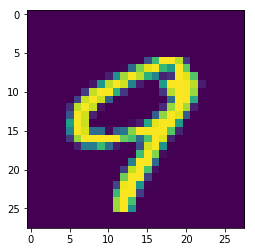

In [10]:
# Examples of digits
index = 100
plt.figure(1)
plt.imshow(train_x.iloc[index,:].reshape(28,28))
print("Corresponding label = " + str(train_y[index]))

In [11]:
# Standardize data to have feature values between 0 and 1
tarin_x = train_x/255
test_x = test/255

print("train_x's shape: "+str(train_x.shape))
print("test_x's shape: "+str(test_x.shape))

train_x's shape: (42000, 784)
test_x's shape: (28000, 784)


In [12]:
# initialize parameters
def initialize_parameters(n_x,n_h,n_y):
    """
    inputs:
    n_x -- size of input layer
    n_h -- size of hidden layer
    n_y -- size of output layer
    
    outputs:
    parameters
    """
    # W1 : weight of matrix of shape (n_h,n_x)
    W1 = np.random.randn(n_h,n_x) * 0.01
    # b1 : bias vector of shape (n_h,1)
    b1 = np.zeros((n_h,1))
    # W2 : weight of matrix of shape (n_y,n_h)
    W2 = np.random.randn(n_y,n_h) * 0.01
    # b2 : bias vector of shape (n_y,1)
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1" : W1,
                 "b1" : b1,
                 "W2" : W2,
                 "b2" : b2}
    
    return parameters

In [13]:
# initial parameters
parametrs = initialize_parameters(2,2,1)
print("W1 = "+str(parametrs["W1"]))
print("b1 = "+str(parametrs["b1"]))
print("W2 = "+str(parametrs["W2"]))
print("b2 = "+str(parametrs["b2"]))

W1 = [[ 0.00468246 -0.00220411]
 [-0.00430312 -0.00199859]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.00723089 -0.01496409]]
b2 = [[ 0.]]


In [14]:
def initialize_parameters_deep(layer_dims):
    """
    inputs:
    layer_dims: list of the dimention of each layer
    
    outputs:
    parameters: containing the weight and bias parameters of deep neural networks
    Wl : weight matrix of shape (layer_dims[l],layer_dims[l-1])
    bl : bias vector of shape (layer_dims[l],1)
    """
    parameters = {}
    # number of layers in the network
    L = len(layer_dims)
    
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.001
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters   

In [15]:
# initial parameters of deep neural nets
parametrs = initialize_parameters_deep([6,4,3])
print("W1 = "+str(parametrs["W1"]))
print("b1 = "+str(parametrs["b1"]))
print("W2 = "+str(parametrs["W2"]))
print("b2 = "+str(parametrs["b2"]))

W1 = [[-0.00029746 -0.00028724 -0.00114869  0.0001015   0.00137852  0.00011196]
 [ 0.00105769 -0.00038552  0.00027897  0.00098101  0.00062238 -0.00018929]
 [-0.00050321  0.0004753  -0.00070215  0.00069441  0.00152079 -0.00010627]
 [-0.00062617 -0.00124563 -0.00041645 -0.00120129  0.0008703  -0.00012588]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[  1.24248678e-04  -8.64079488e-04   4.76760996e-06   7.13820305e-04]
 [ -7.85909201e-04   1.09480471e-05   1.17339756e-03   2.20189012e-04]
 [  1.17873599e-03  -2.46672359e-03  -5.20755119e-04   5.78387222e-04]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


In [16]:
# forward propagation Module
# building the linear part of NN
def linear_forward(A,W,b):
    '''
    inputs:
    A --- Activation from previous layer
    W,b --- parameters of NN
    
    outputs:
    Z --- linear equation or input for the activation layer
    cache --- stored A, W and b
    '''
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    return Z, cache

In [17]:
# sigmoid function 
def sigmoid(Z):
    '''
    Z : input value, vector or matrix
    
    A : sigmoid of Z
    '''
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

In [18]:
# derivative of sigmoid function
def sigmoid_backward(dA, activation_cache):
    #print("dA: "+str(dA))
    Z = activation_cache
    #print("Z: "+str(Z))
    A,cache = sigmoid(Z)
    dSig = np.multiply(A, (1-A))
    #print("dSig: "+str(dSig))
    dZ = np.multiply(dA,dSig)
    #print("dZ: "+str(dZ))
    return dZ

In [19]:
def softmax(Z):
    exps = np.exp(Z)
    A = exps/np.sum(exps)
    cache = Z
    return A, cache

In [20]:
def softmax_backward(dA, activation_cache):
    Z = activation_cache
    A,cache = softmax(Z)
    dSoft = np.mutiply(A,(1-A))
    dZ = np.multiply(dA,dSoft)
    return dZ

In [21]:
# ReLU function
def relu(Z):
    A = Z * (Z>0)
    cache = Z
    return A, cache


In [22]:
# Derivative of ReLU function
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dRelu = (Z > 0)
    dRelu = dRelu.astype(float)
    dZ = np.multiply(dA,dRelu)
    return dZ

In [23]:
# linear activation function
def linear_activation_forward(A_prev, W, b, activation):
    '''
    inputs: 
    A_prev, W, b --- As defined in the linear_forward function
    activation  --- activation to be used
    
    outputs:
    A -- output of the activation function
    cache -- containing linear cache and activation cache which will use in backpropagation 
            calulation         
   '''
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        #print("Z: "+str(Z))
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [24]:
# L-layer linear activation function
def L_model_forward(X, parameters):
    '''
    X --- data
    parameters --- output of initialize_parameters_deep()
    
    AL -- last post activation value
    '''
    caches = []
    A = X
    L = len(parameters)//2
    # implimentation of [Linear ---> RELU * (L-1)]
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)],"relu")
        caches.append(cache)
    # implimentation of Linear ---> sigmoid
    AL, cache = linear_activation_forward(A, parameters["W" + str(l)], parameters["b" + str(l)], "sigmoid")
    caches.append(cache)
    
    return AL, caches
    

In [25]:
def one_hot_matrix(Y, n_y):
    Y = np.vstack(Y)
    Y_ = np.zeros((Y.shape[0],n_y))
    Y_[np.arange(Y.shape[0]),Y.T] = 1
    Y_ = Y_.T
    return Y_
    

In [26]:
Y = one_hot_matrix(train_y,10)

In [27]:
# computing the cost function
def compute_cost1(AL, Y):
    '''
    AL --- probability vector corresponding to label prediction
    Y --- correct label vector
    
    cost --- entropy cost
    '''
    m = Y.shape[0]
    #print(AL[1,:])
    cost = 0
    for i in range(0,10):
        cost = cost-np.sum(np.multiply(np.log(AL[i,:]),(Y==i)) + np.multiply(np.log(1-AL[i,:]),(1-(Y==i))))/m
    cost = np.squeeze(cost)
    return cost

In [28]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y)+np.multiply(np.log(1-AL),(1-Y)))/m
    return cost

In [29]:
# Backward propagation module
# Implimentation of backward propagation for single layer
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.matmul(dZ,A_prev.T)/m
    db = np.sum(dZ, axis=1,keepdims = True)/m
    dA_prev = np.matmul(W.T,dZ)
    return dA_prev, dW, db
    

In [30]:
# linear activation backward
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [31]:
# implimentation for parameter updation
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2
    for l in range(L):
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate * grads["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate * grads["db"+str(l+1)]
    return parameters

In [32]:
# Two layer model
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0001, num_iteration = 3000):
    costs = []
    grads = {}
    m = X.shape[0]
    (n_x,n_h,n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Y_ = Y
    Y = one_hot_matrix(Y,n_y)
    
    for i in range(0,num_iteration):
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        cost = compute_cost(A2, Y)
        #Y = one_hot_matrix(Y_,n_y)
        #cost1 = compute_cost1(A2,Y_)
        #print(cost1,cost)
        # initializing backward propagation
        #print("cost1: "+str(cost1))
        #print("cost: "+str(cost))
        #print("A1: "+str(A1))
        #print("A2: "+str(A2))
        #print(cost1)
        dA2 = -(np.divide(Y,A2) - np.divide((1-Y),(1-A2)))
        #dA2 = A2 - Y
        #print("dA2: "+str(dA2))
        #print("cache2 : "+str(cache2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i,np.squeeze(cost)))
        if i%100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.figure(6)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = "+str(learning_rate))
    plt.show()
    return parameters

Cost after iteration 0: 7.344962787614941
Cost after iteration 100: 2.4983120579908027
Cost after iteration 200: 1.8094503805738475
Cost after iteration 300: 1.4720843346393584
Cost after iteration 400: 1.2854437047722154
Cost after iteration 500: 1.1661576361514323
Cost after iteration 600: 1.081502291557627
Cost after iteration 700: 1.01689875490986
Cost after iteration 800: 0.9654390823538223
Cost after iteration 900: 0.9230534058755071
Cost after iteration 1000: 0.8872332226637695
Cost after iteration 1100: 0.8563652621589363
Cost after iteration 1200: 0.8294544600701013
Cost after iteration 1300: 0.8058083309536634
Cost after iteration 1400: 0.7847295646142267
Cost after iteration 1500: 0.7658074489342956
Cost after iteration 1600: 0.748695535466529
Cost after iteration 1700: 0.7330655850168863
Cost after iteration 1800: 0.7186906475549059
Cost after iteration 1900: 0.7054274319197643
Cost after iteration 2000: 0.6930999149645413
Cost after iteration 2100: 0.6815974658754301
Cost 

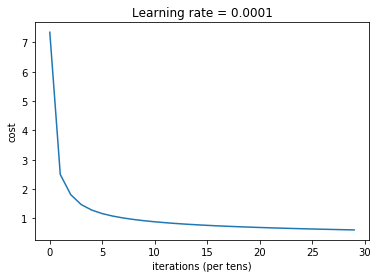

In [33]:
# Constant for the model
n_x = 784 ; # number of pixels of each image
n_h = 30
n_y = 10; # number of possible digits
layers_dims = (n_x, n_h, n_y)
train_y = np.array(train_y)
parameters = two_layer_model(train_x.T,train_y,layers_dims)

In [34]:
print(parameters)

{'W1': array([[  8.45929262e-03,  -1.02715367e-03,   2.08872598e-02, ...,
         -7.25754317e-03,  -6.91062218e-03,   1.33468975e-03],
       [  1.32285189e-03,  -1.18028855e-02,  -1.04873497e-02, ...,
          3.77924486e-03,   8.85470690e-03,  -7.67739958e-03],
       [ -8.87059251e-03,   3.12378390e-03,   2.16403769e-03, ...,
         -4.64943587e-03,   1.39812210e-02,  -2.56316406e-03],
       ..., 
       [  6.15820273e-03,  -1.05149610e-02,  -8.69191295e-03, ...,
          1.36976594e-02,  -5.01988163e-03,   6.93481673e-05],
       [  1.83471740e-02,   8.13953653e-03,   7.99688037e-03, ...,
         -2.55190812e-03,  -1.27130805e-03,  -1.35578591e-02],
       [ -1.14160349e-02,  -1.70090425e-03,   4.54977430e-03, ...,
         -6.58920884e-04,  -4.00403035e-03,   4.39923706e-03]]), 'b1': array([[  5.77469576e-05],
       [  2.96048950e-05],
       [  2.89286408e-05],
       [ -4.44604254e-06],
       [  2.55777345e-05],
       [  2.26472717e-05],
       [  8.19208397e-06],
   

In [35]:
def predict(X, y, parameters):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    y = one_hot_matrix(y,b2.shape[0])
    y_prediction = np.zeros(y.shape)
    A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
    A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
    y_prediction = A2 > 0.5
    y_prediction = y_prediction.astype(float)
    accuracy = 100 - np.mean(np.abs(y_prediction -y))
    return accuracy

In [36]:
train_accuracy = predict(train_x.T, train_y, parameters)
print("train accuracy: "+str(train_accuracy)+"%")

train accuracy: 99.980897619%


In [37]:
def decode_one_hot_matrix(mat):
    vec = np.argmax(mat, axis = 0)
    return vec

In [38]:
def predicted_digit(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    y_prediction = np.zeros((b2.shape[0],X.shape[1]),np.float)
    A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
    A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
    y_prediction = A2 > 0.5
    y_prediction = y_prediction.astype(float)
    y_prediction = decode_one_hot_matrix(y_prediction)
    return y_prediction

In [39]:
test_y =predicted_digit(test.T,parameters)
pd.DataFrame(test_y)

,0
0,2
1,0
2,9
3,7
4,3
5,7
6,0
7,3
8,0
9,3


In [49]:
ImageId = np.array(list(range(test_y.shape[0])))
ImageId = ImageId + 1
submission = pd.DataFrame({
        "ImageId": ImageId,
        "Label": test_y
    })
submission.to_csv("output2.csv", index=False)
outputFile = pd.read_csv("output2.csv")
outputFile.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


Corresponding label = 2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


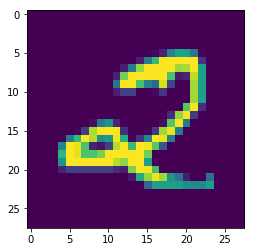

In [50]:
index = 25000
plt.figure(7)
plt.imshow(test.iloc[index,:].reshape(28,28))
print("Corresponding label = " + str(test_y[index]))